<h1 style="background-color:orange; text-align: center; border-radius: 15px 50px; height: 32px">Libraries, Utilities and Load dataset</h1>

In [1]:
!pip3 install crepes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from crepes import WrapClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/differentiated-thyroid-cancer-recurrence-dataset/Thyroid_Diff.csv')

In [4]:
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

<h1 style="background-color:orange; text-align: center; border-radius: 15px 50px; height: 32px">Preprocessing</h1>

In [6]:
df_cleaned = df.drop_duplicates()
df_cleaned.reset_index(inplace=True,drop=True)

In [7]:
df.shape[0] - df_cleaned.shape[0]

19

<h1 style="background-color:orange; text-align: center; border-radius: 15px 50px; height: 32px">Exloratory Data Analysis</h1>

In [8]:
mean_age = df_cleaned['Age'].mean()
std_age = df_cleaned['Age'].std()
median_age = df_cleaned['Age'].median()

print(f'Average of Ages: {mean_age:.0f}')
print(f'Stand. Deviation of Ages: {std_age:.0f}')
print(f'Median of Ages: {median_age:.0f}')

Average of Ages: 41
Stand. Deviation of Ages: 15
Median of Ages: 38


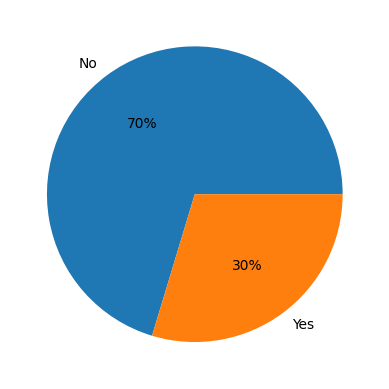

In [9]:
plt.pie(df_cleaned.groupby('Recurred').count()['Age'].to_numpy(), labels=['No', 'Yes'], autopct='%0.f%%')
plt.show()

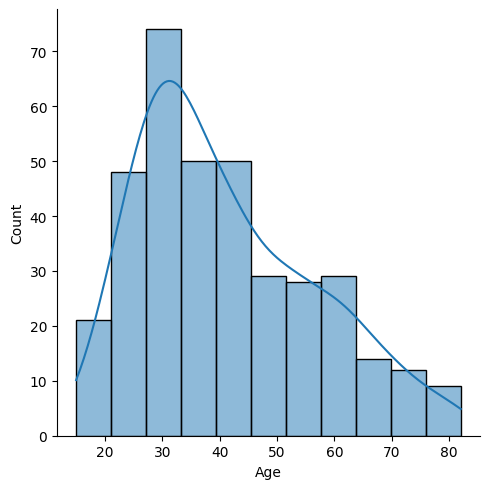

In [10]:
sns.displot(df_cleaned,x='Age', kde=True)
plt.show()

In [11]:
df_cleaned.groupby(['Recurred', 'Thyroid Function']).count()

Age  Gender  Smoking  Hx Smoking  \
Recurred Thyroid Function                                                
No       Clinical Hyperthyroidism      17      17       17          17   
         Clinical Hypothyroidism       10      10       10          10   
         Euthyroid                    215     215      215         215   
         Subclinical Hyperthyroidism    5       5        5           5   
         Subclinical Hypothyroidism     9       9        9           9   
Yes      Clinical Hyperthyroidism       3       3        3           3   
         Clinical Hypothyroidism        2       2        2           2   
         Euthyroid                     98      98       98          98   
         Subclinical Hypothyroidism     5       5        5           5   

                                      Hx Radiothreapy  Physical Examination  \
Recurred Thyroid Function                                                     
No       Clinical Hyperthyroidism                  17                    17   
         Clinical Hypothyroidism                   10                    10   
         Euthyroid                                215                   215   
         Subclinical Hyperthyroidism                5                     5   
         Subclinical Hypothyroidism                 9                     9   
Yes      Clinical Hyperthyroidism                   3                     3   
         Clinical Hypothyroidism                    2                     2   
         Euthyroid                                 98                    98   
         Subclinical Hypothyroidism                 5                     5   

                                      Adenopathy  Pathology  Focality  Risk  \
Recurred Thyroid Function                                                     
No       Clinical Hyperthyroidism             17         17        17    17   
         Clinical Hypothyroidism              10         10        10    10   
         Euthyroid                           215        215       215   215   
         Subclinical Hyperthyroidism           5          5         5     5   
         Subclinical Hypothyroidism            9          9         9     9   
Yes      Clinical Hyperthyroidism              3          3         3     3   
         Clinical Hypothyroidism               2          2         2     2   
         Euthyroid                            98         98        98    98   
         Subclinical Hypothyroidism            5          5         5     5   

                                        T    N    M  Stage  Response  
Recurred Thyroid Function                                             
No       Clinical Hyperthyroidism      17   17   17     17        17  
         Clinical Hypothyroidism       10   10   10     10        10  
         Euthyroid                    215  215  215    215       215  
         Subclinical Hyperthyroidism    5    5    5      5         5  
         Subclinical Hypothyroidism     9    9    9      9         9  
Yes      Clinical Hyperthyroidism       3    3    3      3         3  
         Clinical Hypothyroidism        2    2    2      2         2  
         Euthyroid                     98   98   98     98        98  
         Subclinical Hypothyroidism     5    5    5      5         5

In [12]:
df_cleaned.groupby(['Recurred', 'Smoking']).count()

Age  Gender  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
Recurred Smoking                                                               
No       No       240     240         240              240               240   
         Yes       16      16          16               16                16   
Yes      No        75      75          75               75                75   
         Yes       33      33          33               33                33   

                  Physical Examination  Adenopathy  Pathology  Focality  Risk  \
Recurred Smoking                                                                
No       No                        240         240        240       240   240   
         Yes                        16          16         16        16    16   
Yes      No                         75          75         75        75    75   
         Yes                        33          33         33        33    33   

                    T    N    M  Stage  Response  
Recurred Smoking                                  
No       No       240  240  240    240       240  
         Yes       16   16   16     16        16  
Yes      No        75   75   75     75        75  
         Yes       33   33   33     33        33

In [13]:
df_cleaned.groupby(['Recurred','Response', 'Risk']).count()

Age  Gender  Smoking  \
Recurred Response               Risk                                 
No       Biochemical Incomplete Intermediate    1       1        1   
                                Low            11      11       11   
         Excellent              Intermediate   17      17       17   
                                Low           171     171      171   
         Indeterminate          Intermediate   19      19       19   
                                Low            35      35       35   
         Structural Incomplete  Intermediate    1       1        1   
                                Low             1       1        1   
Yes      Biochemical Incomplete High            3       3        3   
                                Intermediate    6       6        6   
                                Low             2       2        2   
         Excellent              Intermediate    1       1        1   
         Indeterminate          Intermediate    6       6        6   
                                Low             1       1        1   
         Structural Incomplete  High           29      29       29   
                                Intermediate   51      51       51   
                                Low             9       9        9   

                                              Hx Smoking  Hx Radiothreapy  \
Recurred Response               Risk                                        
No       Biochemical Incomplete Intermediate           1                1   
                                Low                   11               11   
         Excellent              Intermediate          17               17   
                                Low                  171              171   
         Indeterminate          Intermediate          19               19   
                                Low                   35               35   
         Structural Incomplete  Intermediate           1                1   
                                Low                    1                1   
Yes      Biochemical Incomplete High                   3                3   
                                Intermediate           6                6   
                                Low                    2                2   
         Excellent              Intermediate           1                1   
         Indeterminate          Intermediate           6                6   
                                Low                    1                1   
         Structural Incomplete  High                  29               29   
                                Intermediate          51               51   
                                Low                    9                9   

                                              Thyroid Function  \
Recurred Response               Risk                             
No       Biochemical Incomplete Intermediate                 1   
                                Low                         11   
         Excellent              Intermediate                17   
                                Low                        171   
         Indeterminate          Intermediate                19   
                                Low                         35   
         Structural Incomplete  Intermediate                 1   
                                Low                          1   
Yes      Biochemical Incomplete High                         3   
                                Intermediate                 6   
                                Low                          2   
         Excellent              Intermediate                 1   
         Indeterminate          Intermediate                 6   
                                Low                          1   
         Structural Incomplete  High                        29   
                                Intermediate                51   
                                Low                          9 

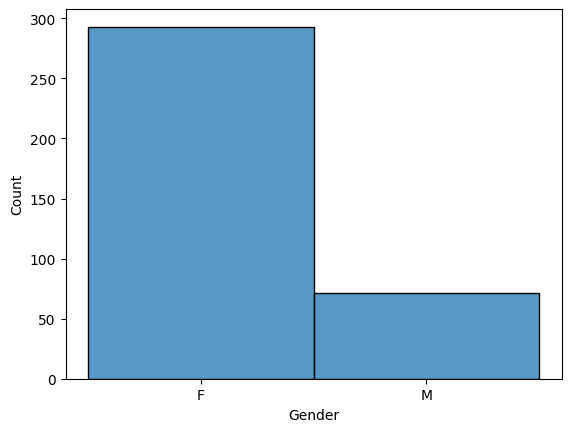

In [14]:
sns.histplot(df_cleaned, x='Gender')
plt.show()

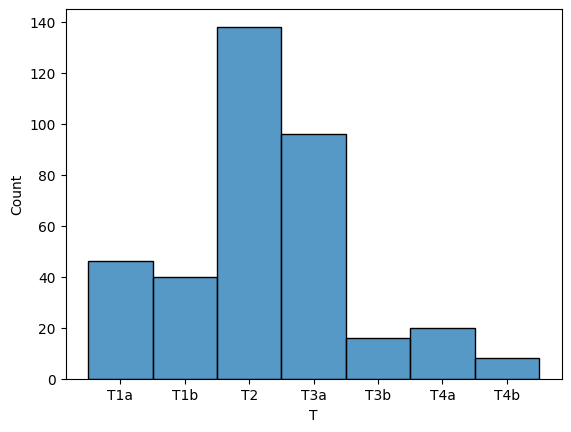

In [15]:
sns.histplot(df_cleaned, x='T')
plt.show()

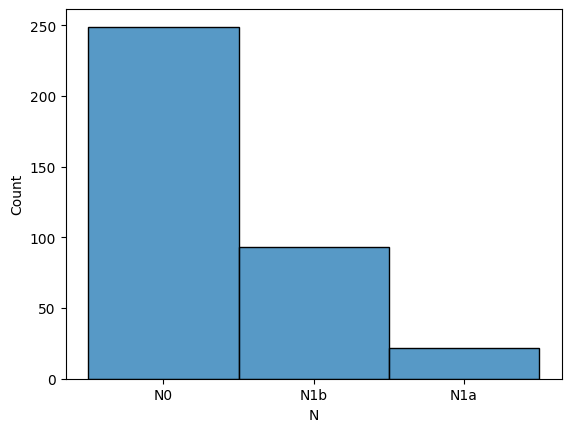

In [16]:
sns.histplot(df_cleaned, x='N')
plt.show()

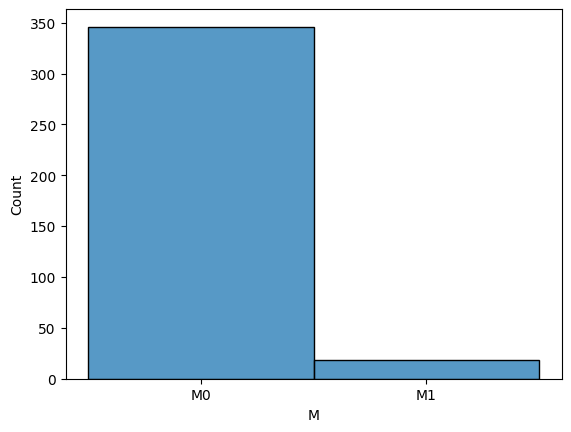

In [17]:
sns.histplot(df_cleaned, x='M')
plt.show()

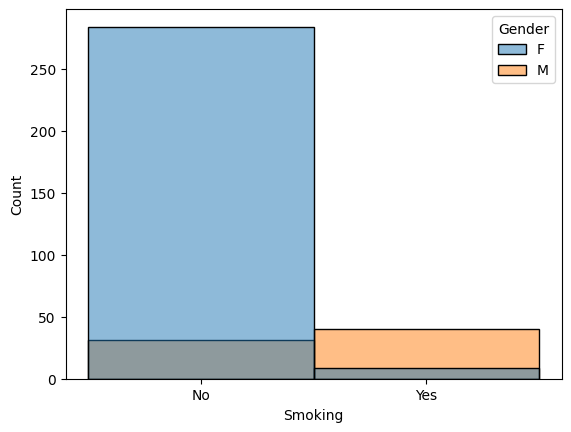

In [18]:
sns.histplot(df_cleaned,x='Smoking', hue='Gender')
plt.show()

In [19]:
df_cleaned.groupby(['Smoking'])['Age'].mean()

Smoking
No     39.409524
Yes    53.081633
Name: Age, dtype: float64

In [20]:
df_cleaned.groupby(['Response'])['Age'].mean()

Response
Biochemical Incomplete    46.869565
Excellent                 37.661376
Indeterminate             42.803279
Structural Incomplete     46.241758
Name: Age, dtype: float64

In [21]:
df_cleaned.groupby(['Recurred'])['Age'].mean()

Recurred
No     38.777344
Yes    47.111111
Name: Age, dtype: float64

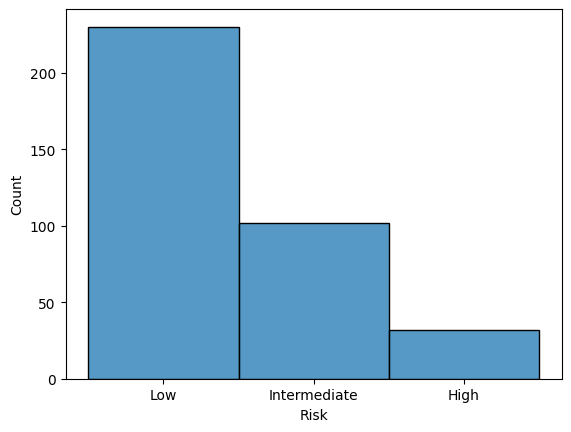

In [22]:
sns.histplot(df_cleaned, x='Risk')
plt.show()

The study population, is characterised by 293 females (80%) and 71 males (20%), where most non-smokers are women. The average age is 41 years old, and a standard deviation of 15 years old. Most population is aged between 20 and 45 years old.

Most population has a low risk of thyroid cancer. In addition, people who don't smoke have an average age of 39 years old, while people who do smoke have an average age of 53 years old. It could be related to the average age in the response to cancer and the recurrence of thyroid cancer. That is, the average age of people with recurrent cancer is 47 years old, while the average age of people without recurrence is 39 years old. In addition, people with excellent response have an average age of 38 years old, while the remaining responses present an average age of over 42 years old. 


70% of the population has no recurrence of thyroid cancer, while 30% have a recurrence. Of those who have not had a recurrence, 84% have Euthyroidism, and 7% have Clinical Hyperthyroidism. In addition, of those who did not have a recurrence, 240 people did not smoke, and 67% had an excellent response with a low risk. On the other hand, of the cases that did recur, 47% had a Structural Incomplete and an intermediate risk. In addition, 69% of these cases don't smoke, and most cases have an Euthyroid.

<h1 style="background-color:orange; text-align: center; border-radius: 15px 50px; height: 32px">Feature Engineering</h1>

In [23]:
df_cleaned['Recurred'] = np.where(df_cleaned['Recurred'] == 'Yes',0,1)
df_cleaned['Gender'] = np.where(df_cleaned['Gender'] == 'F',0,1)
df_cleaned['Smoking'] = np.where(df_cleaned['Smoking'] == 'No',0,1)
df_cleaned['Hx Smoking'] = np.where(df_cleaned['Hx Smoking'] == 'No',0,1)
df_cleaned['Hx Radiothreapy'] = np.where(df_cleaned['Hx Radiothreapy'] == 'No',0,1)
df_cleaned['Adenopathy'] = np.where(df_cleaned['Adenopathy'] == 'No',0,1)
df_cleaned['Focality'] = np.where(df_cleaned['Focality'] == 'Uni-Focal',0,1)
df_cleaned['M'] = np.where(df_cleaned['M'] == 'M0',0,1)

df_cleaned.loc[df_cleaned['Thyroid Function'] == 'Euthyroid','Thyroid Function'] = 1
df_cleaned.loc[df_cleaned['Thyroid Function'] == 'Clinical Hyperthyroidism','Thyroid Function'] = 2
df_cleaned.loc[df_cleaned['Thyroid Function'] == 'Clinical Hypothyroidism','Thyroid Function'] = 3
df_cleaned.loc[df_cleaned['Thyroid Function'] == 'Subclinical Hyperthyroidism','Thyroid Function'] = 4
df_cleaned.loc[df_cleaned['Thyroid Function'] == 'Subclinical Hypothyroidism','Thyroid Function'] = 5

df_cleaned.loc[df_cleaned['Physical Examination'] == 'Single nodular goiter-left','Physical Examination'] = 1
df_cleaned.loc[df_cleaned['Physical Examination'] == 'Multinodular goiter','Physical Examination'] = 2
df_cleaned.loc[df_cleaned['Physical Examination'] == 'Single nodular goiter-right','Physical Examination'] = 3
df_cleaned.loc[df_cleaned['Physical Examination'] == 'Normal','Physical Examination'] = 4
df_cleaned.loc[df_cleaned['Physical Examination'] == 'Diffuse goiter','Physical Examination'] = 5

df_cleaned.loc[df_cleaned['Pathology'] == 'Micropapillary','Pathology'] = 1
df_cleaned.loc[df_cleaned['Pathology'] == 'Papillary','Pathology'] = 2
df_cleaned.loc[df_cleaned['Pathology'] == 'Follicular','Pathology'] = 3
df_cleaned.loc[df_cleaned['Pathology'] == 'Hurthel cell','Pathology'] = 4

df_cleaned.loc[df_cleaned['Risk'] == 'Low','Risk'] = 0
df_cleaned.loc[df_cleaned['Risk'] == 'Intermediate','Risk'] = 1
df_cleaned.loc[df_cleaned['Risk'] == 'High','Risk'] = 2

df_cleaned.loc[df_cleaned['T'] == 'T1a','T'] = 1
df_cleaned.loc[df_cleaned['T'] == 'T1b','T'] = 2
df_cleaned.loc[df_cleaned['T'] == 'T2','T'] = 3
df_cleaned.loc[df_cleaned['T'] == 'T3a','T'] = 4
df_cleaned.loc[df_cleaned['T'] == 'T3b','T'] = 5
df_cleaned.loc[df_cleaned['T'] == 'T4a','T'] = 6
df_cleaned.loc[df_cleaned['T'] == 'T4b','T'] = 7

df_cleaned.loc[df_cleaned['N'] == 'N0','N'] = 0
df_cleaned.loc[df_cleaned['N'] == 'N1b','N'] = 1
df_cleaned.loc[df_cleaned['N'] == 'N1a','N'] = 2

df_cleaned.loc[df_cleaned['Response'] == 'Indeterminate','Response'] = 1
df_cleaned.loc[df_cleaned['Response'] == 'Excellent','Response'] = 2
df_cleaned.loc[df_cleaned['Response'] == 'Structural Incomplete','Response'] = 3
df_cleaned.loc[df_cleaned['Response'] == 'Biochemical Incomplete','Response'] = 4

df_cleaned.loc[df_cleaned['Stage'] == 'I','Stage'] = 1
df_cleaned.loc[df_cleaned['Stage'] == 'II','Stage'] = 2
df_cleaned.loc[df_cleaned['Stage'] == 'III','Stage'] = 3
df_cleaned.loc[df_cleaned['Stage'] == 'IVA','Stage'] = 4
df_cleaned.loc[df_cleaned['Stage'] == 'IVB','Stage'] = 5


In [24]:
df_cleaned['Thyroid Function'] = df_cleaned['Thyroid Function'].astype('int64')
df_cleaned['Physical Examination'] = df_cleaned['Physical Examination'].astype('int64')
df_cleaned['Pathology'] = df_cleaned['Pathology'].astype('int64')
df_cleaned['Risk'] = df_cleaned['Risk'].astype('int64')
df_cleaned['T'] = df_cleaned['T'].astype('int64')
df_cleaned['N'] = df_cleaned['N'].astype('int64')
df_cleaned['Response'] = df_cleaned['Response'].astype('int64')
df_cleaned['Stage'] = df_cleaned['Stage'].astype('int64')

<h1 style="background-color:orange; text-align: center; border-radius: 15px 50px; height: 32px">Feature Selection</h1>

In [18]:
X = df_cleaned.iloc[:,:-1]
y = df_cleaned['Recurred']

In [19]:
anova = SelectKBest(f_classif, k=10)
anova.fit(X,y)

index_anova = anova.get_support(indices=True)
X.iloc[:,index_anova].columns

Index(['Gender', 'Smoking', 'Adenopathy', 'Focality', 'Risk', 'T', 'N', 'M',
       'Stage', 'Response'],
      dtype='object')

In [20]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=10)
rfe.fit(X,y)

index_rfe = rfe.get_support(indices=True)
X.iloc[:,index_rfe].columns

Index(['Age', 'Gender', 'Thyroid Function', 'Physical Examination',
       'Adenopathy', 'Risk', 'T', 'N', 'Stage', 'Response'],
      dtype='object')

In [21]:
rf = SelectFromModel(RandomForestClassifier(), max_features=10)
rf.fit(X,y)

index_rf = rf.get_support(indices=True)
X.iloc[:,index_rf].columns

Index(['Adenopathy', 'Risk', 'N', 'Response'], dtype='object')

<h1 style="background-color:orange; text-align: center; border-radius: 15px 50px; height: 32px">Sample Dataset</h1>

In [25]:
unseen_data = df_cleaned.sample(frac=0.05)
learning_data = df_cleaned.drop(unseen_data.index)

In [26]:
X_unseen= unseen_data[['Gender', 'Smoking', 'Adenopathy', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']]
y_unseen = unseen_data['Recurred']

In [27]:
X = learning_data[['Gender', 'Smoking', 'Adenopathy', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']]
y = learning_data['Recurred']

<h1 style="background-color:orange; text-align: center; border-radius: 15px 50px; height: 32px">Split Dataset</h1>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, stratify=y)

In [29]:
X_prop_train, X_cal, y_prop_train, y_cal = train_test_split(X_train, y_train, test_size=.15, shuffle=True, stratify=y_train)

<h1 style="background-color:orange; text-align: center; border-radius: 15px 50px; height: 32px">Oversampling</h1>

In [ ]:
sm = SMOTE()
X_prop_train_res, y_prop_train_res = sm.fit_resample(X_prop_train, y_prop_train)

In [ ]:
adasyn = ADASYN()
X_prop_train_res, y_prop_train_res = adasyn.fit_resample(X_prop_train, y_prop_train)

In [ ]:
svm_sm = SVMSMOTE()
X_prop_train_res, y_prop_train_res = svm_sm.fit_resample(X_prop_train, y_prop_train)

In [ ]:
bd_sm = BoderlineSMOTE()
X_prop_train_res, y_prop_train_res = bd_sm.fit_resample(X_prop_train, y_prop_train)

In [ ]:
ksm = KMeasnSMOTE()
X_prop_train_res, y_prop_train_res = ksm.fit_resample(X_prop_train, y_prop_train)

In [ ]:
x_axis = len(np.where(y_prop_train_res == 1))
y_axis = len(np.where(y_prop_train_res == 0))

plt.pie([x_axis, y_axis], labels=['No', 'Yes'], autopct='%0.f%%')
plt.show()

<h1 style="background-color:orange; text-align: center; border-radius: 15px 50px; height: 32px">Train</h1>

In [31]:
# Random Forest
rf = WrapClassifier(RandomForestClassifier())
rf.fit(X_prop_train,y_prop_train)

display(rf)

WrapClassifier(learner=RandomForestClassifier(), calibrated=False)

In [32]:
rf.calibrate(X_cal,y_cal)

display(rf)

WrapClassifier(learner=RandomForestClassifier(), calibrated=True, predictor=ConformalClassifier(fitted=True, mondrian=False))

In [38]:
rf.learner.classes_

array([0, 1])

In [33]:
predictions_rf = rf.predict_set(X_test)

display(predictions_rf)

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [39]:
p_values = rf.predict_p(X_test)
display(p_values)

array([[9.94642538e-03, 5.09602445e-01],
       [1.14824353e-02, 5.81050783e-01],
       [9.53608342e-01, 4.79044509e-03],
       [3.68879814e-02, 6.15071532e-02],
       [1.99896643e-02, 7.77733948e-01],
       [1.78956592e-01, 1.06574740e-02],
       [1.53661209e-02, 3.72493970e-01],
       [1.53525240e-02, 9.83653773e-01],
       [2.16207569e-02, 2.18529450e-01],
       [2.08367783e-02, 6.64089577e-01],
       [8.44117223e-01, 2.57802120e-02],
       [2.60812301e-02, 7.30639821e-01],
       [1.96200401e-02, 8.90320693e-01],
       [1.84994259e-02, 1.58451761e-01],
       [1.26946512e-02, 9.24102159e-01],
       [1.55399498e-02, 7.49289022e-01],
       [1.68759987e-02, 6.24873392e-01],
       [1.63426130e-02, 5.02826010e-01],
       [6.98603724e-02, 3.83338398e-02],
       [1.22548462e-02, 9.44095144e-01],
       [3.12207996e-01, 5.13501789e-03],
       [4.44293018e-03, 5.10723535e-01],
       [1.71185987e-01, 1.76160527e-03],
       [1.64544993e-02, 8.97024112e-01],
       [8.507406

In [34]:
rf.evaluate(X_test,y_test)

{'error': 0.028846153846153855,
 'avg_c': 1.0384615384615385,
 'one_c': 0.9615384615384616,
 'empty': 0.0,
 'ks_test': 0.022109652524568826,
 'time_fit': 5.4836273193359375e-06,
 'time_evaluate': 0.02521824836730957}

In [41]:
# Decision Tree
dt = WrapClassifier(DecisionTreeClassifier())
dt.fit(X_prop_train,y_prop_train)

display(dt)

WrapClassifier(learner=DecisionTreeClassifier(), calibrated=False)

In [43]:
dt.calibrate(X_cal,y_cal)

display(dt)

WrapClassifier(learner=DecisionTreeClassifier(), calibrated=True, predictor=ConformalClassifier(fitted=True, mondrian=False))

In [44]:
predictions_dt = dt.predict_set(X_test)

display(predictions_dt)

array([[0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0,

In [45]:
p_values_dt = dt.predict_p(X_test)
display(p_values_dt)

array([[7.13492752e-03, 3.60290234e-01],
       [4.98375588e-02, 5.57189244e-01],
       [8.47892494e-01, 5.10084237e-02],
       [4.14079878e-01, 5.62690122e-02],
       [3.66608962e-02, 7.34781510e-01],
       [5.82744290e-01, 9.26956719e-02],
       [1.04236310e-01, 7.45326112e-01],
       [2.18801679e-02, 1.93114797e-01],
       [9.46619789e-03, 4.86580177e-01],
       [3.53721069e-02, 6.18031384e-01],
       [9.15074933e-01, 9.24687665e-02],
       [2.52869419e-02, 9.55944328e-01],
       [9.91600511e-02, 7.17219116e-01],
       [1.01536765e-01, 9.76709990e-01],
       [8.49243678e-02, 8.54364476e-01],
       [6.66600483e-02, 6.82137165e-01],
       [7.46208098e-02, 2.99496596e-01],
       [9.65718680e-02, 1.95942511e-01],
       [7.49558075e-01, 1.34334425e-03],
       [9.31347876e-02, 4.20525133e-01],
       [5.82667269e-01, 7.92883601e-02],
       [8.35074723e-02, 5.68434119e-01],
       [2.29556044e-01, 9.37049709e-02],
       [8.71306091e-02, 2.58257911e-01],
       [3.944222

In [46]:
dt.evaluate(X_test,y_test)

{'error': 0.028846153846153855,
 'avg_c': 1.5576923076923077,
 'one_c': 0.4423076923076923,
 'empty': 0.0,
 'ks_test': 0.04631015024346139,
 'time_fit': 6.9141387939453125e-06,
 'time_evaluate': 0.013370990753173828}

In [50]:
# Support Vector Machine
svm = WrapClassifier(SVC(probability=True))
svm.fit(X_prop_train,y_prop_train)

display(svm)

WrapClassifier(learner=SVC(probability=True), calibrated=False)

In [51]:
svm.calibrate(X_cal,y_cal)

display(svm)

WrapClassifier(learner=SVC(probability=True), calibrated=True, predictor=ConformalClassifier(fitted=True, mondrian=False))

In [52]:
predictions_svm = svm.predict_set(X_test)

display(predictions_svm)

array([[0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0,

In [53]:
p_values_svm = svm.predict_p(X_test)
display(p_values_svm)

array([[6.75181087e-03, 9.03911088e-01],
       [1.56380073e-02, 7.17407690e-01],
       [2.61308242e-01, 5.90898047e-02],
       [5.83647499e-02, 2.34401510e-01],
       [1.45623069e-02, 6.35407464e-01],
       [1.71542603e-01, 5.45279759e-02],
       [5.62708438e-02, 1.76538946e-01],
       [1.08632499e-02, 6.39196281e-01],
       [1.00934744e-02, 6.03573980e-01],
       [4.10226466e-03, 8.60805692e-01],
       [3.52304148e-01, 7.12689411e-02],
       [2.84242658e-03, 8.49450894e-01],
       [2.18139494e-02, 5.63990403e-01],
       [6.82531553e-02, 1.07984218e-01],
       [1.33560106e-02, 5.83608075e-01],
       [7.94847275e-03, 6.49907768e-01],
       [1.67756793e-02, 5.33461294e-01],
       [1.45420245e-02, 5.79416462e-01],
       [5.85339796e-02, 1.27652764e-01],
       [1.28670391e-02, 8.63010555e-01],
       [5.24824849e-01, 1.67010986e-03],
       [2.53547390e-02, 6.69599837e-01],
       [1.08809803e-01, 7.72658048e-02],
       [1.97910897e-02, 4.23725545e-01],
       [8.565225

In [54]:
svm.evaluate(X_test,y_test)

{'error': 0.028846153846153855,
 'avg_c': 1.3269230769230769,
 'one_c': 0.6730769230769231,
 'empty': 0.0,
 'ks_test': 0.04873053836137186,
 'time_fit': 4.76837158203125e-06,
 'time_evaluate': 0.013588190078735352}

<h1 style="background-color:orange; text-align: center; border-radius: 15px 50px; height: 32px">Test in Unseen Data</h1>

In [40]:
rf.evaluate(X_unseen,y_unseen)

{'error': 0.11111111111111116,
 'avg_c': 1.0555555555555556,
 'one_c': 0.9444444444444444,
 'empty': 0.0,
 'ks_test': 0.9628754769130026,
 'time_fit': 5.4836273193359375e-06,
 'time_evaluate': 0.017362117767333984}

In [47]:
dt.evaluate(X_test,y_test)

{'error': 0.038461538461538436,
 'avg_c': 1.5096153846153846,
 'one_c': 0.49038461538461536,
 'empty': 0.0,
 'ks_test': 0.6511945076037071,
 'time_fit': 6.9141387939453125e-06,
 'time_evaluate': 0.013824939727783203}

In [55]:
svm.evaluate(X_test,y_test)

{'error': 0.028846153846153855,
 'avg_c': 1.3269230769230769,
 'one_c': 0.6730769230769231,
 'empty': 0.0,
 'ks_test': 0.0734515949344722,
 'time_fit': 4.76837158203125e-06,
 'time_evaluate': 0.015326976776123047}

<h1 style="background-color:red; text-align: center; border-radius: 15px 50px; height: 32px">Mondrian Conformal Predictors</h1>

Mondrian Conformal Predictors (MCPs) are a generalization of CP, with the added feature of validity within categories. This means that MCPs evaluate the confidence of predictions independently for each category or label, ensuring stronger validity for large datasets compared to traditional CP methods.

In [84]:
# Wrapped classifier
rf_mond = WrapClassifier(RandomForestClassifier())

In [85]:
# Train classifier
rf_mond.fit(X_prop_train, y_prop_train)

In [86]:
rf_mond.calibrate(X_cal, y_cal, mc=rf_mond.predict)

WrapClassifier(learner=RandomForestClassifier(), calibrated=True, predictor=ConformalClassifier(fitted=True, mondrian=True))

In [87]:
rf_mond.predict_set(X_test)

array([[0, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0,

In [88]:
rf_mond.evaluate(X_test, y_test, confidence=0.99)

{'error': 0.028846153846153855,
 'avg_c': 1.7115384615384615,
 'one_c': 0.2692307692307692,
 'empty': 0.009615384615384616,
 'time_fit': 8.487701416015625e-05,
 'time_evaluate': 0.028516292572021484}